In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle
from pandas import Timestamp
import csv
#from helferlein_thomas import files
#from firesfromSpace import date_seperating 
from scipy.stats import poisson
from scipy.stats import expon
import folium
from IPython.display import HTML, display

In [4]:
#m6 = pd.read_csv(r'..\Data\Clean\carchive_M6.csv')

In [5]:
#nrtmodis = pd.read_csv(r'..\Data\Clean\cnrt_M6.csv')

In [3]:
rain = pd.read_csv(r'..\Data\Clean\rain.csv')

In [4]:
wind = pd.read_csv(r'..\Data\Clean\wind.csv')

In [47]:
weather = pd.read_csv(r'..\Data\Clean\cweather.csv')

In [48]:
import os
os.getcwd()

'D:\\Dokumente\\GitHub\\AustralienFiresFromSpace_Schoeggl_Vorauer\\Notebooks'

In [49]:
def datetime(df):
    '''spalte acq_date als Datetime auszeichnen'''
    df['acq_date'] = pd.to_datetime(df['acq_date'])
    return df 

In [50]:
weather_dated = datetime(weather)

In [51]:
def timeselect(df, freq = 'D', fct = 'mean', columns = ['frp','brightness', 'bright_t31']):
    '''definiert die wochen aller dataframes akurat; wochenbeginn montag, datum correct'''
    df['acq_date'] = pd.to_datetime(df['acq_date'])-pd.to_timedelta(7, unit='d')
    if fct == 'mean': out = df.groupby([pd.Grouper(key='acq_date', freq=freq)])[columns].mean().reset_index().sort_values('acq_date')
    if fct == 'max':  out = df.groupby([pd.Grouper(key='acq_date', freq=freq)])[columns].max().reset_index().sort_values('acq_date')
    if fct == 'min':  out = df.groupby([pd.Grouper(key='acq_date', freq=freq)])[columns].min().reset_index().sort_values('acq_date')
    return out

In [52]:
weather.keys()

Index(['acq_date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow', 'latitude',
       'longitude'],
      dtype='object')

In [53]:
weat_timesel = timeselect(weather, freq='W', fct='mean', columns = ['MinTemp', 'MaxTemp','WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm'])

In [54]:
weat_time_temp = timeselect(weather, freq='W', fct='mean', columns = ['MinTemp', 'MaxTemp',])

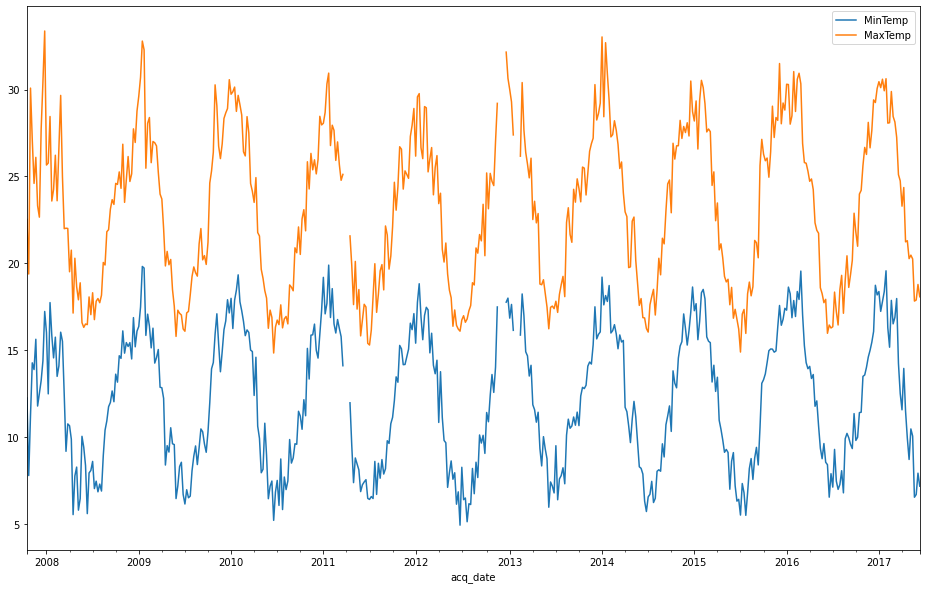

In [55]:
weat_time_temp.set_index('acq_date').plot(figsize=(16,10))

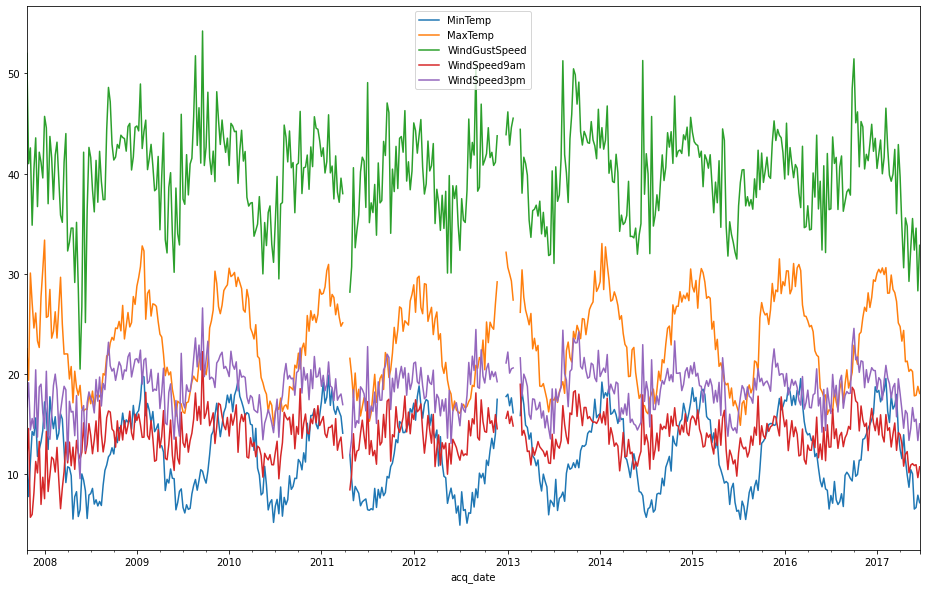

In [56]:
weat_timesel.set_index('acq_date').plot(figsize=(16,10))

In [57]:
def date_seperating(df, sel): 
    '''splits dataframes into weeks, months, years'''
    out = []
    if 'D' in sel:
        out.append([g.reset_index() for n, g in df.set_index('acq_date').groupby(pd.Grouper(freq = 'D'))])
    if 'W' in sel:
        out.append([g.reset_index() for n, g in df.set_index('acq_date').groupby(pd.Grouper(freq = 'W'))])
    if 'M' in sel:
        out.append([g.reset_index() for n, g in df.set_index('acq_date').groupby(pd.Grouper(freq = 'M'))])
    if 'Y' in sel:
        out.append([g.reset_index() for n, g in df.set_index('acq_date').groupby(pd.Grouper(freq = 'Y'))])
    return out 
    # return ([g for n, g in df.set_index('acq_date').groupby(pd.Grouper(freq = 'D'))],
    #         [g for n, g in df.set_index('acq_date').groupby(pd.Grouper(freq = 'W'))], 
    #         [g for n, g in df.set_index('acq_date').groupby(pd.Grouper(freq = 'M'))],
    #         [g for n, g in df.set_index('acq_date').groupby(pd.Grouper(freq = 'Y'))])
#weeks, month, year = date_seperating(weather, 'W')


In [58]:
weeks, month, year = date_seperating(weather, 'W M Y')
week0 = weeks[0]

#weather_days =[g for n, g in weather.set_index('acq_date').groupby(pd.Grouper(freq = 'D'))]
#weather_weeks =[g for n, g in weather.set_index('acq_date').groupby(pd.Grouper(freq = 'W'))]

In [59]:
#trennt eine woche in tage
weat_weeks_temp = timeselect(weeks[5], freq='D', fct='mean', columns = ['MinTemp', 'MaxTemp'])

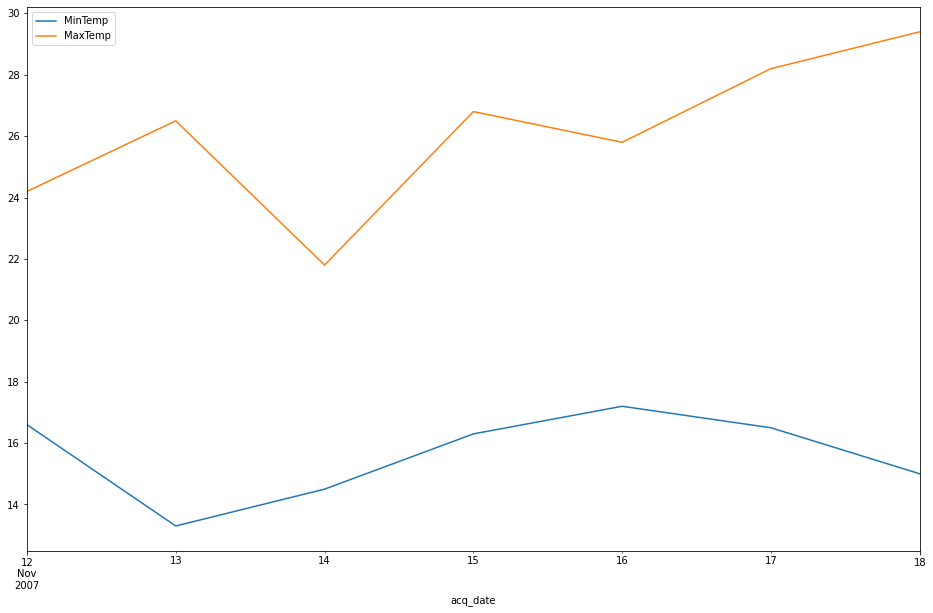

In [60]:
weat_weeks_temp.set_index('acq_date').plot(figsize=(16,10))

In [61]:
#trennt ein jahr in wochen
weat_year_temp = timeselect(year[1], freq='W', fct='mean', columns = ['MinTemp', 'MaxTemp'])

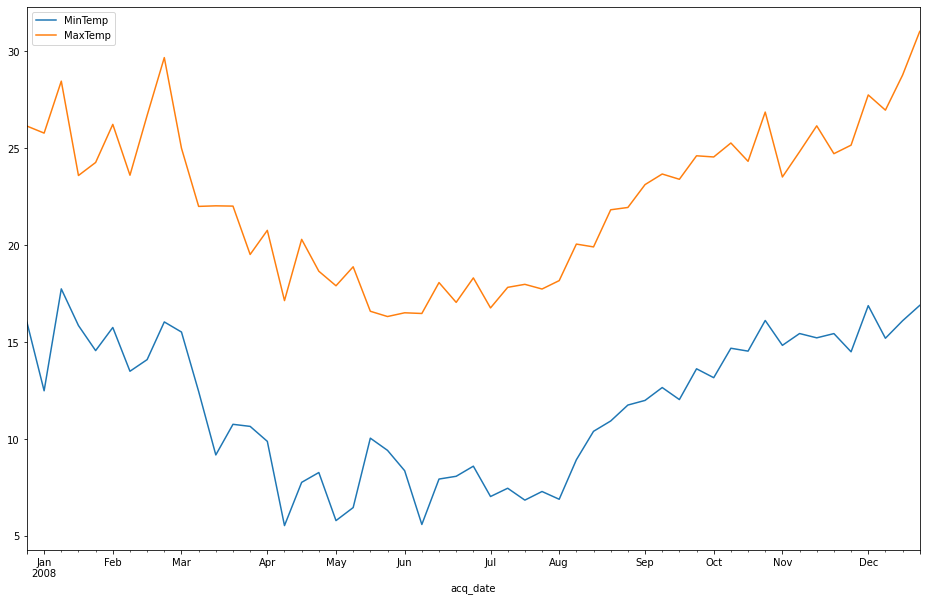

In [62]:
weat_year_temp.set_index('acq_date').plot(figsize=(16,10))

In [63]:
weather.keys()

Index(['acq_date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow', 'latitude',
       'longitude'],
      dtype='object')

In [64]:
weather.MaxTemp.max()

48.1

plt.plot(weather.set_index('acq_date'))

In [65]:
weather['acq_date'] = pd.to_datetime(weather['acq_date'])
dfww = weather.groupby([pd.Grouper(key='acq_date', freq='D')])[['MaxTemp','WindGustSpeed', 'WindGustDir']].mean().reset_index().sort_values('acq_date')

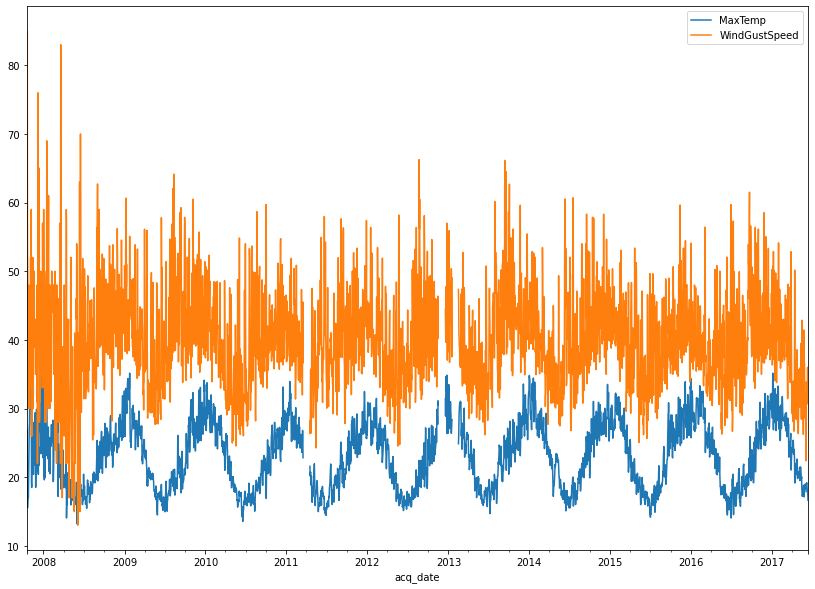

In [66]:
dfww.set_index('acq_date').plot(figsize = (14,10))

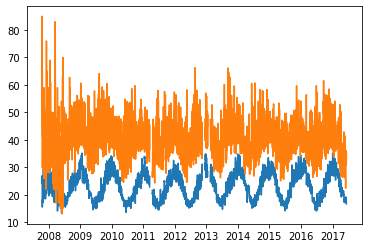

In [67]:
plt.plot(dfww.set_index('acq_date'))

In [ ]:
sum(weather.isnull().values.ravel())

In [71]:
sum([True for idx,row in weather.iterrows() if any(row.isnull())])

85773

In [72]:
weather.isna().sum()

acq_date             0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
latitude             0
longitude            0
dtype: int64

In [73]:
weather.isna().sum().sum()

316559

In [46]:
weather.dropna()

,acq_date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,latitude,longitude
5939,2008-12-18,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,1004.4,2.0,5.0,26.6,33.4,No,0.0,No,-31.498333,145.834444
5940,2008-12-19,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,1012.1,1.0,1.0,20.3,27.0,No,0.0,No,-31.498333,145.834444
5942,2008-12-21,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,1009.2,1.0,6.0,28.7,34.9,No,0.0,No,-31.498333,145.834444
5943,2008-12-22,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,1009.1,1.0,5.0,29.1,35.6,No,0.0,No,-31.498333,145.834444
5944,2008-12-23,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,1007.4,1.0,6.0,33.6,37.6,No,0.0,No,-31.498333,145.834444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139108,2017-06-06,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,1010.5,0.0,1.0,24.5,32.3,No,0.0,No,-12.460440,130.841047
139109,2017-06-07,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,1011.2,7.0,0.0,24.8,32.0,No,0.0,No,-12.460440,130.841047
139110,2017-06-08,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,1011.8,0.0,0.0,24.8,32.1,No,0.0,No,-12.460440,130.841047
139111,2017-06-09,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,1010.7,1.0,1.0,24.8,29.2,No,0.0,No,-12.460440,130.841047
